In [51]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')

## 1) Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

In [52]:
sales_df = pd.read_csv('kc_house_data.csv')
sales_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


#### id - номер                     
#### date - дата                           
#### price - цена                             
#### bedrooms  - спальни                  
#### bathrooms  - ванные комнаты                 
#### sqft_living  - кв.м жилой площади               
#### sqft_lot  - кв.м участка земли                         
#### floors   -  этажи                     
#### waterfront - набережная                     
#### view   - вид                         
#### condition - состояние
#### grade - класс
#### sqft_above - кв.м чердака
#### sqft_basement - кв. м. подвала
#### yr_built  - год постройки
#### yr_renovated - год ремонта
#### zipcode  - индекс
#### lat  - ширина
#### long - длина
#### sqft_living15 - кв.м жилой площади15
#### sqft_lot15 - кв.м участка земли15

## 2)	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [53]:
sales_df.shape

(21613, 21)

In [54]:
sales_df = sales_df.drop_duplicates()
sales_df.shape

(21613, 21)

## 3)  Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

In [55]:
numerical = [i for i in sales_df.columns if sales_df[i].dtype.name != 'object']
categorial = [i for i in sales_df.columns if sales_df[i].dtype.name == 'object']
print(numerical)
print(categorial)

['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
['date']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'id'),
  Text(1, 0, 'price'),
  Text(2, 0, 'bedrooms'),
  Text(3, 0, 'bathrooms'),
  Text(4, 0, 'sqft_living'),
  Text(5, 0, 'sqft_lot'),
  Text(6, 0, 'floors'),
  Text(7, 0, 'waterfront'),
  Text(8, 0, 'view'),
  Text(9, 0, 'condition'),
  Text(10, 0, 'grade'),
  Text(11, 0, 'sqft_above'),
  Text(12, 0, 'sqft_basement'),
  Text(13, 0, 'yr_built'),
  Text(14, 0, 'yr_renovated'),
  Text(15, 0, 'zipcode'),
  Text(16, 0, 'lat'),
  Text(17, 0, 'long'),
  Text(18, 0, 'sqft_living15'),
  Text(19, 0, 'sqft_lot15')])

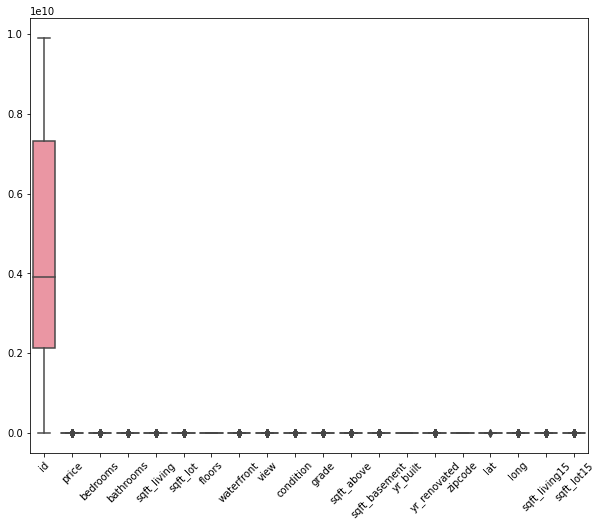

In [56]:
plt.figure(figsize=(10,8))
sns.boxplot(data=sales_df[numerical])
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'id'),
  Text(1, 0, 'price'),
  Text(2, 0, 'bedrooms'),
  Text(3, 0, 'bathrooms'),
  Text(4, 0, 'sqft_living'),
  Text(5, 0, 'sqft_lot'),
  Text(6, 0, 'floors'),
  Text(7, 0, 'waterfront'),
  Text(8, 0, 'view'),
  Text(9, 0, 'condition'),
  Text(10, 0, 'grade'),
  Text(11, 0, 'sqft_above'),
  Text(12, 0, 'sqft_basement'),
  Text(13, 0, 'yr_built'),
  Text(14, 0, 'yr_renovated'),
  Text(15, 0, 'zipcode'),
  Text(16, 0, 'lat'),
  Text(17, 0, 'long'),
  Text(18, 0, 'sqft_living15'),
  Text(19, 0, 'sqft_lot15')])

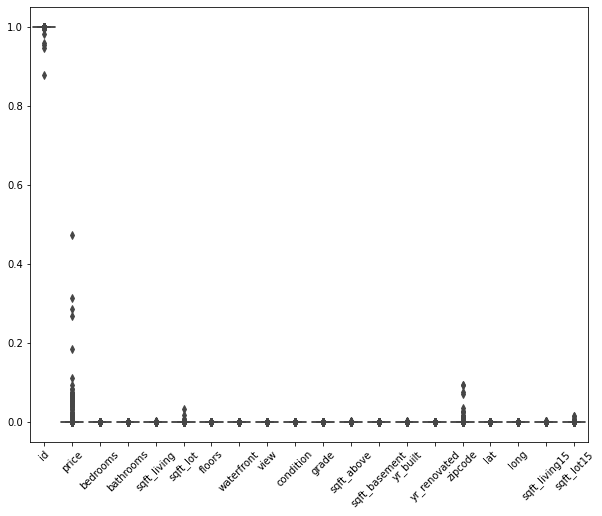

In [57]:
sales_df[numerical] = preprocessing.normalize(sales_df[numerical])
plt.figure(figsize=(10,8))
sns.boxplot(data=sales_df[numerical])
plt.xticks(rotation=45)

## 4.  Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [58]:
labelEncoder = LabelEncoder() 
sales_df['date'] = labelEncoder.fit_transform(sales_df['date'])
sales_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1.000000,164,0.000031,4.207986e-10,1.402662e-10,1.655141e-07,7.925041e-07,1.402662e-10,0.0,0.0,...,9.818635e-10,1.655141e-07,0.000000e+00,2.742205e-07,0.000000e+00,0.000014,6.664216e-09,-1.714853e-08,1.879567e-07,7.925041e-07
1,1.000000,220,0.000084,4.677195e-10,3.507897e-10,4.006797e-07,1.129075e-06,3.118130e-10,0.0,0.0,...,1.091346e-09,3.383171e-07,6.236261e-08,3.041736e-07,3.104099e-07,0.000015,7.440015e-09,-1.907033e-08,2.634820e-07,1.190970e-06
2,1.000000,290,0.000032,3.551451e-10,1.775726e-10,1.367309e-07,1.775726e-06,1.775726e-10,0.0,0.0,...,1.065435e-09,1.367309e-07,0.000000e+00,3.432478e-07,0.000000e+00,0.000017,8.476942e-09,-2.170523e-08,4.829974e-07,1.431590e-06
3,1.000000,220,0.000243,1.608234e-09,1.206175e-09,7.880344e-07,2.010292e-06,4.020584e-10,0.0,0.0,...,2.814409e-09,4.221613e-07,3.658731e-07,7.900447e-07,0.000000e+00,0.000039,1.910614e-08,-4.920913e-08,5.467994e-07,2.010292e-06
4,1.000000,283,0.000261,1.534997e-09,1.023332e-09,8.595986e-07,4.134260e-06,5.116658e-10,0.0,0.0,...,4.093327e-09,8.595986e-07,0.000000e+00,1.016680e-06,0.000000e+00,0.000050,2.436389e-08,-6.244626e-08,9.209985e-07,3.839029e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.999999,19,0.001369,1.140683e-08,9.505693e-09,5.817484e-06,4.300376e-06,1.140683e-08,0.0,0.0,...,3.041822e-08,5.817484e-06,0.000000e+00,7.638775e-06,0.000000e+00,0.000373,1.813660e-07,-4.651934e-07,5.817484e-06,5.737636e-06
21609,1.000000,288,0.000061,6.060551e-10,3.787844e-10,3.499968e-07,8.807496e-07,3.030275e-10,0.0,0.0,...,1.212110e-09,3.499968e-07,0.000000e+00,3.051487e-07,0.000000e+00,0.000015,7.198525e-09,-1.853953e-08,2.772702e-07,1.090899e-06
21610,1.000000,52,0.000264,1.312939e-09,4.923521e-10,6.695988e-07,8.862337e-07,1.312939e-09,0.0,0.0,...,4.595286e-09,6.695988e-07,0.000000e+00,1.318847e-06,0.000000e+00,0.000064,3.124427e-08,-8.028555e-08,6.695988e-07,1.317534e-06
21611,0.999999,252,0.001373,1.029829e-08,8.581912e-09,5.492423e-06,8.197442e-06,6.865529e-09,0.0,0.0,...,2.746212e-08,5.492423e-06,0.000000e+00,6.879260e-06,0.000000e+00,0.000337,1.631747e-07,-4.190341e-07,4.840198e-06,4.417968e-06


## 5)  Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;

<AxesSubplot:>

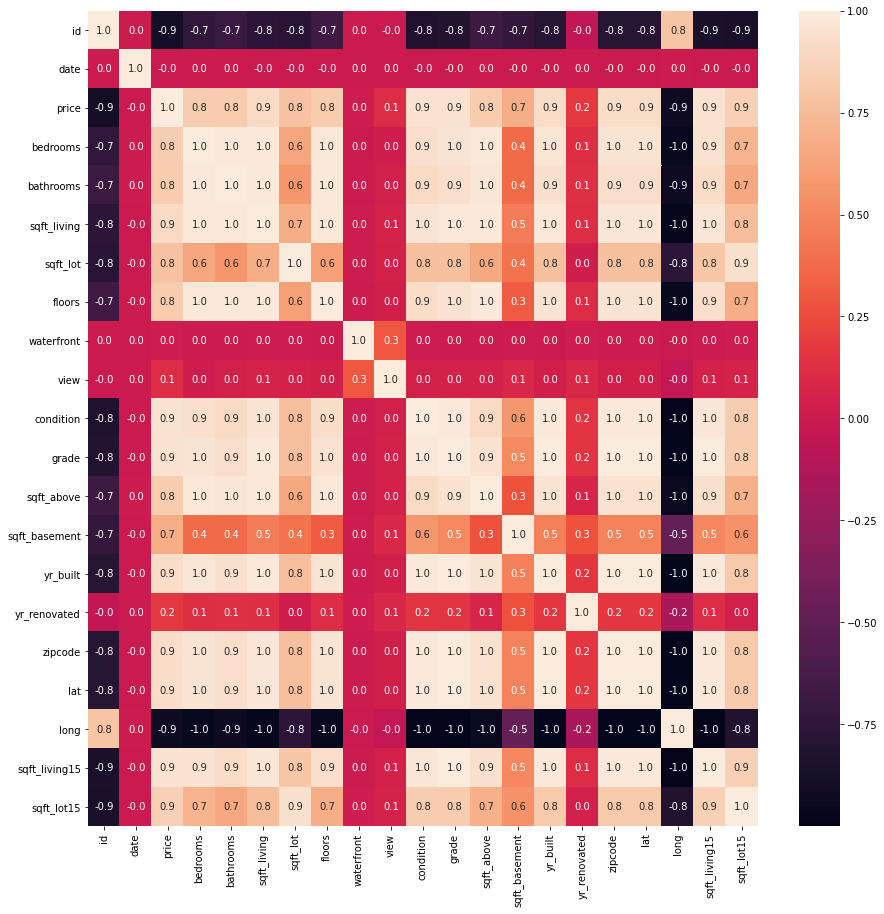

In [59]:
sales_corr_df = sales_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(sales_corr_df, annot=True, fmt='.1f')

In [60]:
sales_df = sales_df.drop(['lat','zipcode','yr_built','sqft_living'],axis = 1)

## 6)  Заполните пропущенные значения в данных;

In [61]:
sales_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_renovated     0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 7)  Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 

In [62]:
x, y = sales_df.drop(['bedrooms','price'], axis=1), sales_df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [63]:
ridge = Ridge()

params = {'alpha': np.arange(-6, 5, 0.05)}
ridge_grid = GridSearchCV(ridge, params)
ridge_grid.fit(x_train, y_train)
best_alpha = ridge_grid.best_estimator_.alpha

ridge = Ridge(alpha = best_alpha)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)

print('Best alpha:', best_alpha)
ridge_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference':y_test-y_pred})
ridge_df.head(10)

Best alpha: 0.049999999999978506


,Actual,Predicted,Difference
3695,0.001091,0.000478,0.000613
962,0.000062,0.000467,-0.000405
13453,0.000090,0.000459,-0.000369
11995,0.000064,0.000485,-0.000421
5295,0.001081,0.000461,0.000621
9401,0.001172,0.000466,0.000707
2099,0.000057,0.000472,-0.000415
5859,0.000147,0.000461,-0.000314
21383,0.002741,0.000479,0.002262
13399,0.000310,0.000485,-0.000175


In [64]:
P, p_value = pearsonr(y_pred, y_test)
S, p_value = spearmanr(y_pred, y_test)
print("Pearson correlation: ", P, 'p_value: ', p_value)
print("Spearman correlation: ", S, "p_value: ", p_value)

Pearson correlation:  0.9532443226276406 p_value:  1.1861935347626565e-80
Spearman correlation:  0.23298059236828564 p_value:  1.1861935347626565e-80


In [65]:
lasso = Lasso()

params = {'alpha': np.arange(-6, 5, 0.05)}
lasso_grid = GridSearchCV(lasso, params)
lasso_grid.fit(x_train, y_train)
best_alpha = lasso_grid.best_estimator_.alpha

lasso = Lasso(alpha=best_alpha)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

print('Best alpha:', best_alpha)
lasso_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference':y_test-y_pred})
lasso_df.head(10)

Best alpha: -2.1316282072803006e-14


,Actual,Predicted,Difference
3695,0.001091,0.000761,0.000330
962,0.000062,0.000099,-0.000037
13453,0.000090,0.000147,-0.000057
11995,0.000064,0.000049,0.000015
5295,0.001081,0.001284,-0.000202
9401,0.001172,0.001086,0.000086
2099,0.000057,0.000099,-0.000042
5859,0.000147,0.000114,0.000033
21383,0.002741,0.001124,0.001617
13399,0.000310,0.000340,-0.000030


In [66]:
P, p_value = pearsonr(y_pred, y_test)
S, p_value = spearmanr(y_pred, y_test)
print("Pearson correlation: ", P, 'p_value: ', p_value)
print("Spearman correlation: ", S, "p_value: ", p_value)

Pearson correlation:  0.9900296239663497 p_value:  0.0
Spearman correlation:  0.8507018224152421 p_value:  0.0
